# Sales Analysis

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Prep

### Merge 12 months of sales data 

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith(".")] # ignore hidden files

df_all_month = pd.DataFrame()

for filename in files:
    df = pd.read_csv(path+"/"+filename)
    df_all_month = pd.concat([df_all_month, df])

df_all_month.to_csv("all_month_data.csv", index=False)
df_all_month

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [3]:
all_data = pd.read_csv("all_data.csv")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Clean the data 

In [4]:
# Drop all NaNs
all_data = all_data.dropna(how="all").reset_index(drop=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
# Drop all rows weird rows
all_data[all_data['Order Date'].str[0:2] == 'Or'] # shows that the df contains the weird rows
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] # excludes those rows

### Prep the df

In [6]:
# Create new month column
all_data['Month'] = all_data['Order Date'].str[0:2].astype('int32')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [7]:
# Need to convert the column types to float
print("Type of Quantity Ordered column: {} \tType of Price Each column: {}".format(type(all_data['Quantity Ordered'].iloc[0]), \
                                                                                   type(all_data['Price Each'].iloc[0])))

Type of Quantity Ordered column: <class 'str'> 	Type of Price Each column: <class 'str'>


In [8]:
# We can also use pd.to_numeric(df)
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [9]:
# Create Sales column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186301,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186302,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [10]:
# Add City column
address = all_data['Purchase Address']
cities = []
for a in address:
    s = a.split(", ")
    city = s[1]
    city_abb = s[2][0:2]
    city = city + " (" + city_abb + ")"
    cities.append(city)
all_data['City'] = cities
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


## Data Exploration

### Question 1: What was the best month for sales? How much was earned that month? 

In [11]:
sales_by_month = all_data.groupby('Month').sum()
sales_by_month

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


Text(0, 0.5, 'Sales in $')

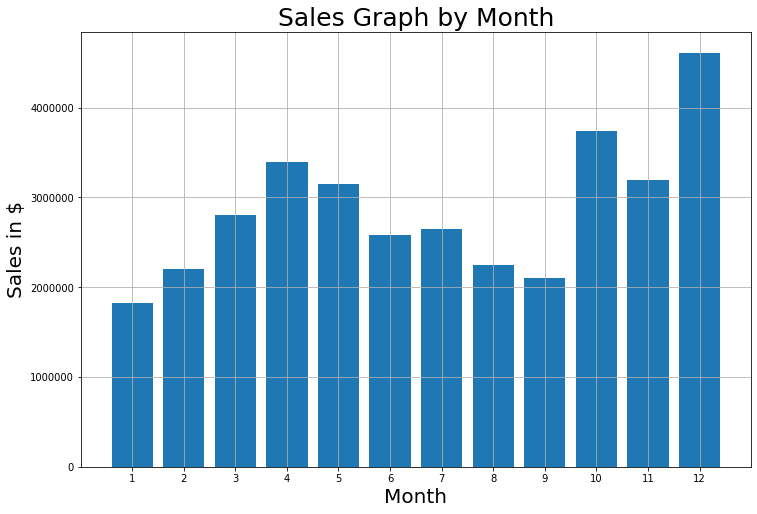

In [12]:
# plot it
months = sales_by_month.index
sales = sales_by_month['Sales']
plt.figure(figsize = (12, 8))
plt.bar(x = months, height = sales)
plt.grid()
plt.title("Sales Graph by Month", fontsize=25)
plt.xlabel("Month", fontsize=20)
plt.xticks(months)
plt.ylabel("Sales in $", fontsize=20)

### Question 2: What city had the highest number of sales?

In [13]:
sales_by_city = all_data.groupby('City').sum()['Sales']
sales_by_city

City
Atlanta (GA)          2.795499e+06
Austin (TX)           1.819582e+06
Boston (MA)           3.661642e+06
Dallas (TX)           2.767975e+06
Los Angeles (CA)      5.452571e+06
New York City (NY)    4.664317e+06
Portland (ME)         4.497583e+05
Portland (OR)         1.870732e+06
San Francisco (CA)    8.262204e+06
Seattle (WA)          2.747755e+06
Name: Sales, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

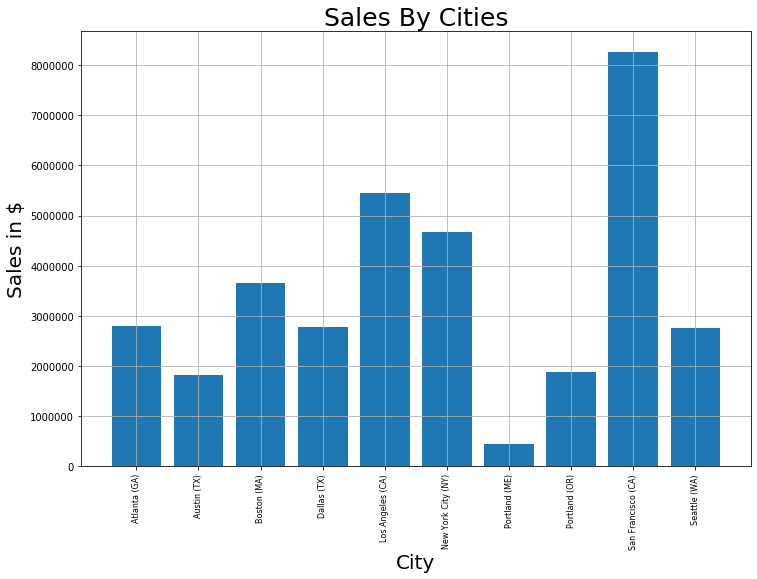

In [14]:
# plot the result
cities = sales_by_city.index
sales = sales_by_city.values

plt.figure(figsize=(12,8))
plt.bar(x=cities, height=sales)
plt.grid()
plt.title("Sales By Cities", fontsize=25)
plt.xlabel("City", fontsize=20)
plt.ylabel("Sales in $", fontsize=20)
plt.xticks(rotation=90, size=8)

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [15]:
# Convert the type of Order Date column into Date type
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
# Create Hour and Minute column
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [16]:
# Now let's anwser the question
orders_by_hours = all_data.groupby('Hour').count()['Sales']
orders_by_hours

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Sales, dtype: int64

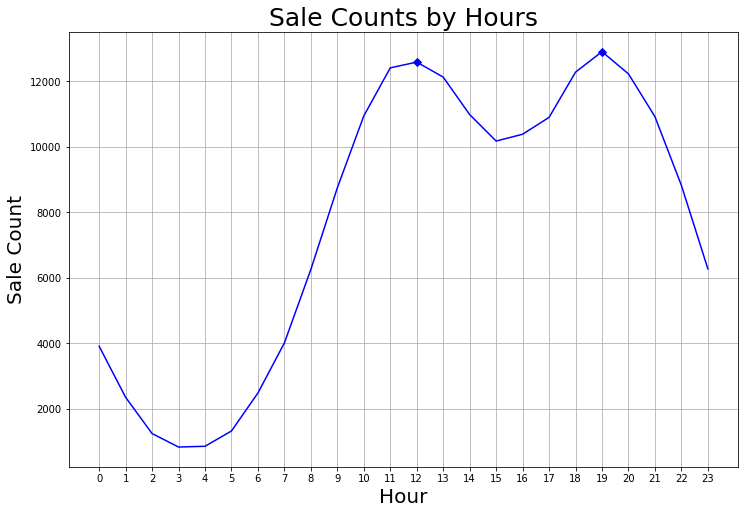

In [17]:
# plot the result
highest_count = list(orders_by_hours.sort_values(ascending=False)[0:2].index)

plt.figure(figsize=(12,8))
plt.plot(orders_by_hours.index, orders_by_hours.values, '-bD', markevery=highest_count)
plt.title("Sale Counts by Hours", fontsize=25)
plt.xlabel("Hour", fontsize=20)
plt.xticks(orders_by_hours.index)
plt.ylabel("Sale Count", fontsize=20)
plt.grid()

#### Seems like 12 and 19 would be the best time to display advertisements to maximize likelihood of customer's buying product

### Question 4: What products are most often sold together?

In [39]:
# Same Order ID -> the customer bought products together.
df = all_data[all_data['Order ID'].duplicated(keep=False)] #keep every duplicated IDs

# Create Grouped column which contains a string of products of a order id
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# Difference btw apply() and transform():
# https://towardsdatascience.com/difference-between-apply-and-transform-in-pandas-242e5cf32705

df2 = df[['Order ID', 'Grouped']].drop_duplicates()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [40]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most? Why do you think it sold the most?

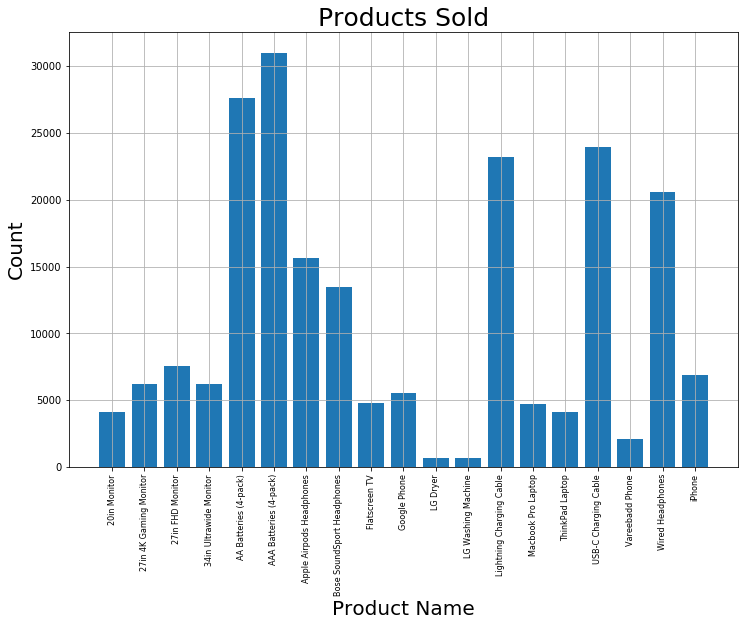

In [51]:
all_products_sold = all_data[['Product', 'Quantity Ordered']].groupby('Product').sum()['Quantity Ordered']
plt.figure(figsize=(12,8))
plt.bar(x=all_products_sold.index, height=all_products_sold.values)
plt.title("Products Sold", fontsize=25)
plt.xlabel("Product Name", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(rotation=90, size=8)
plt.grid()

#### Notice most the products that are sold the most are cheaper products like batteries and charging cable. Let's try to impliment price of each products into our graph.

In [54]:
product_price_mean = all_data.groupby('Product').mean()['Price Each']
product_price_mean

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

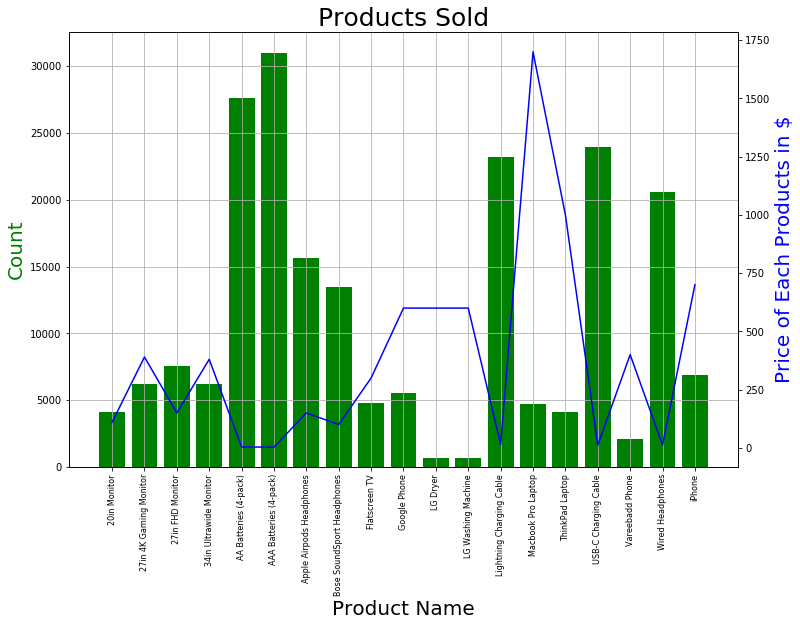

In [68]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax2 = ax1.twinx() # shared x axis with ax1

ax1.bar(x=all_products_sold.index, height=all_products_sold.values, color="green")
ax2.plot(all_products_sold.index, product_price_mean.values, 'b-')

ax1.set_title("Products Sold", fontsize=25)
ax1.set_xlabel("Product Name", fontsize=20)
ax1.set_ylabel("Count", fontsize=20, color="g")
ax1.set_xticks(all_products_sold.index)
ax1.set_xticklabels(all_products_sold.index, rotation=90, size=8)

ax2.set_ylabel("Price of Each Products in $", fontsize=20, color="blue")
ax1.grid()

#### The above graph shows negative correlation between price of each products and the counts of the product sold. However, there are some inconsistency. Macbook pro Laptop, for instance, does not have negative correlation while LG Dryer and LG Washing Machine have negative correlation. This is probably due to the higher demand for Macbook Pro laptop. 